# Data Science and Business Analytics- TSF

## Prediction using Supervised ML

   ### Student Percentage Prediction

Importing Libraries

In [1]:
import pandas as pd
import numpy as np

Importing Dataset

In [4]:
data=pd.read_csv("student_data.csv")

In [5]:
data['Hours'].head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\Users\shrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


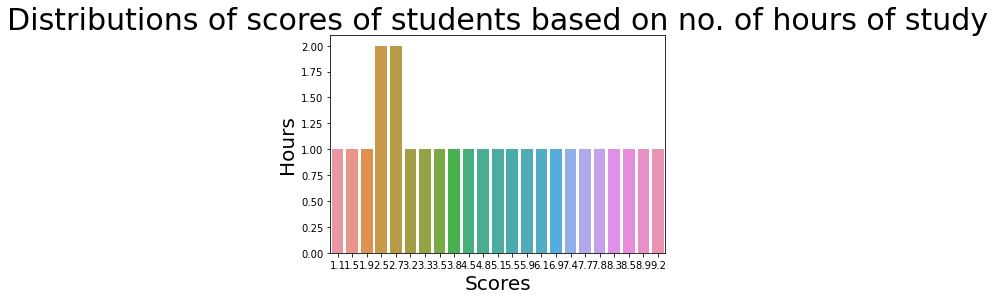

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
b=sns.countplot(data['Hours'])
b.axes.set_title('Distributions of scores of students based on no. of hours of study',fontsize=30)
b.set_xlabel('Scores',fontsize=20)
b.set_ylabel('Hours',fontsize=20)
plt.show()

Plotting the dataset

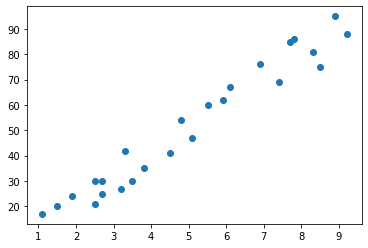

In [9]:
plt.scatter(x=data.Hours,y=data.Scores)
b.axes.set_title('Distributions of scores of students based on no. of hours of study',fontsize=30)
b.set_xlabel('Scores',fontsize=20)
b.set_ylabel('Hours',fontsize=20)
plt.show()

In [10]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
data.shape

(25, 2)

In [12]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [13]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Preparing the Dataset

In [14]:
from sklearn.model_selection import train_test_split
x=data.drop("Scores",axis=1)
y=data['Scores']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
print('Shape of x train',x_train.shape)
print('Shape of y train',y_train.shape)
print('Shape of x train',x_test.shape)
print('Shape of y train',y_test.shape)

Shape of x train (18, 1)
Shape of y train (18,)
Shape of x train (7, 1)
Shape of y train (7,)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
L=LinearRegression()

In [19]:
L.fit(x_train,y_train)

LinearRegression()

In [20]:
L.coef_

array([9.71409219])

In [21]:
L.intercept_

2.480367091505748

In [22]:
print(L.score(x_test,y_test))

0.9553509219739938


In [23]:
y_pred=L.predict(x_test)
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

In [24]:
pd.DataFrame(np.c_[x_test,y_test,y_pred], columns=['sHours','sScores','Pedicted_Scores'])

,sHours,sScores,Pedicted_Scores
0,8.3,81.0,83.107332
1,2.5,30.0,26.765598
2,2.5,21.0,26.765598
3,6.9,76.0,69.507603
4,5.9,62.0,59.793511
5,2.7,25.0,28.708416
6,3.3,42.0,34.536871


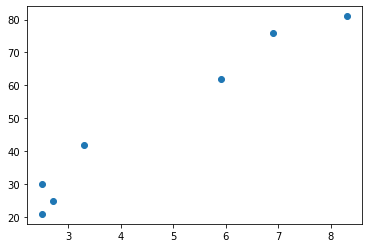

In [25]:
plt.scatter(x_test,y_test)

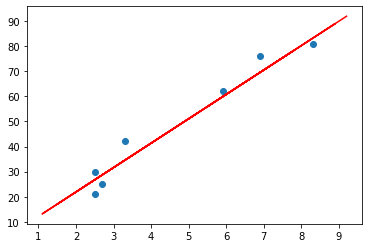

In [26]:
plt.scatter(x_test,y_test)
plt.plot(x_train,L.predict(x_train),color='red')

Evaluating the model

In [27]:
import joblib
joblib.dump(L,"Students_Scores_Prediction.pkl")

['Students_Scores_Prediction.pkl']

In [28]:
model=joblib.load("Students_Scores_Prediction.pkl")

In [29]:
model.predict([[9.2]])

array([91.85001526])